## Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy.special import inv_boxcox


df = pd.read_csv('../dataset/train.csv')
df = df.drop('Id',axis=1)



# Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3]:
categorical = df.select_dtypes(include=['object'])
non_categorical = df.select_dtypes(exclude=['object'])

In [4]:
non_categorical.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


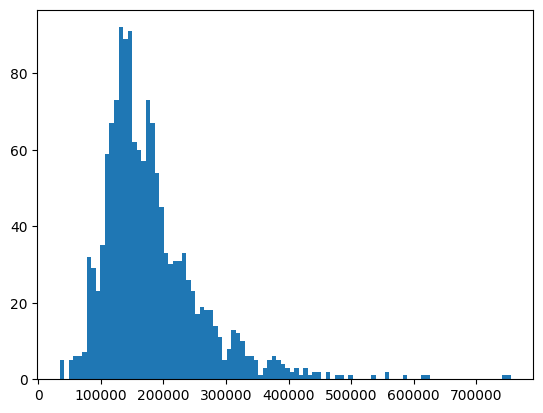

In [5]:
#histogram of the saleprice
plt.hist(non_categorical['SalePrice'],bins=100)
plt.show()

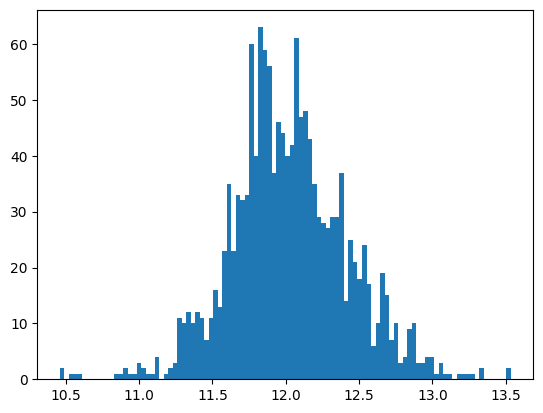

In [6]:
#histogram of the saleprice aplicando log
plt.hist(np.log(non_categorical['SalePrice']),bins=100)
plt.show()

# Primeiro modelo de referencia: utilizar random forest sem fazer um bom data engineering e substituindo valores nulos por 0

In [7]:
#Tentar aplicar random forest para todas as features sem tratar muitos os dados e ver validation com out-bag

#Limpando dados 
categorical_clean = categorical.fillna('0')
non_categorical_clean = non_categorical.fillna(0)

# Instanciando label_encoder
label_encoder = LabelEncoder()
categorical_encoder = pd.DataFrame()
# Iterando sobre as colunas categóricas e aplicando Label Encoding
for col in categorical_clean:
    categorical_encoder[col + '_encoded'] = label_encoder.fit_transform(categorical_clean[col])

categorical_encoder

,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,...,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded
0,3,1,0,3,3,0,4,0,5,2,...,2,2,5,5,2,0,0,0,8,4
1,3,1,0,3,3,0,2,0,24,1,...,2,2,5,5,2,0,0,0,8,4
2,3,1,0,0,3,0,4,0,5,2,...,2,2,5,5,2,0,0,0,8,4
3,3,1,0,0,3,0,0,0,6,2,...,6,3,5,5,2,0,0,0,8,0
4,3,1,0,0,3,0,2,0,15,2,...,2,2,5,5,2,0,0,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,3,3,0,4,0,8,2,...,2,2,5,5,2,0,0,0,8,4
1456,3,1,0,3,3,0,4,0,14,2,...,2,3,5,5,2,0,3,0,8,4
1457,3,1,0,3,3,0,4,0,6,2,...,2,2,5,5,2,0,1,3,8,4
1458,3,1,0,3,3,0,4,0,12,2,...,2,3,5,5,2,0,0,0,8,4


In [8]:
# separando feature e target
X = pd.concat([categorical_encoder , non_categorical_clean],axis =1)
X = X.drop('SalePrice', axis=1)
y = non_categorical['SalePrice']
y_log = y.apply(np.log)
y_boxcox, lambda_value = boxcox(y)

print(y_boxcox,lambda_value)

[7.93260785 7.87826076 7.95961541 ... 8.02737914 7.78100329 7.79588451] -0.07692397686078907


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_train_boxcox, lambda_train = boxcox(y_train)
y_test_boxcox, lambda_test = boxcox(y_test)


# Criando e treinando o modelo de Random Forest
xgb_model_traintest = xgb.XGBRegressor(n_estimators=500)
xgb_model_traintest.fit(X_train, y_train)

# Criando e treinando o modelo de Random Forest com log
xgb_model_traintest_log = xgb.XGBRegressor(n_estimators=500)
xgb_model_traintest_log.fit(X_train, y_train.apply(np.log))

# Criando e treinando o modelo de Random Forest com boxcox
xgb_model_traintest_boxcox = xgb.XGBRegressor(n_estimators=500)
xgb_model_traintest_boxcox.fit(X_train, y_train_boxcox)

# Fazendo previsões no conjunto de teste
predictions = xgb_model_traintest.predict(X_test)
predictions_log = xgb_model_traintest_log.predict(X_test)
predictions_boxcox = xgb_model_traintest_boxcox.predict(X_test)


# Revertendo a transformação Box-Cox nas previsões
predictions_inverse_boxcox = inv_boxcox(predictions_boxcox, lambda_train)

# Avaliando o desempenho do modelo
r2 = r2_score(y_test, predictions)
r2_log = r2_score(y_test.apply(np.log),predictions_log)
r2_boxcox = r2_score(y_test, predictions_inverse_boxcox)

print("R² Score:", r2)
print("R² Score com log:", r2_log)
print("R² Score com boxcox:", r2_boxcox)


R² Score: 0.888381390206823
R² Score com log: 0.8795354728918273
R² Score com boxcox: 0.8413789166097009


In [10]:
# Aplicando a validação cruzada
cv_scores = cross_val_score(xgb.XGBRegressor(n_estimators=100), X, y, cv=5, scoring='r2')
cv_scores_log = cross_val_score(xgb.XGBRegressor(n_estimators=100), X, y.apply(np.log), cv=5, scoring='r2')
cv_scores_boxcox = cross_val_score(xgb.XGBRegressor(n_estimators=100), X, y_boxcox, cv=5, scoring='r2')
# Exibindo os scores de validação cruzada
print("R² Scores da validação cruzada:", cv_scores)
print("R² Scores da validação cruzada com log:", cv_scores_log)
print("R² Scores da validação cruzada com boxcox:", cv_scores_boxcox)
# Calculando a média dos scores
mean_r2 = cv_scores.mean()
mean_r2_log = cv_scores_log.mean()
mean_r2_boxcox = cv_scores_boxcox.mean()
print("Média dos R² Scores:", mean_r2,mean_r2_log,mean_r2_boxcox)

R² Scores da validação cruzada: [0.87996876 0.85438992 0.87965273 0.8980883  0.86493012]
R² Scores da validação cruzada com log: [0.88476095 0.87827188 0.87720498 0.88911167 0.87680639]
R² Scores da validação cruzada com boxcox: [0.86562588 0.87442183 0.87853686 0.88868456 0.88399839]
Média dos R² Scores: 0.8754059657661621 0.8812311748670287 0.8782535043468244


# Analise dos Resídos


In [11]:
#Analisando residuos quando sem aplicar log e aplicando log

residual = pd.DataFrame(y_test - predictions)
residual_log = pd.DataFrame(y_test.apply(np.log) - predictions_log)


# Criar um objeto Standardscale
scaler = StandardScaler()
# Ajustar o scaler aos dados e transformar os dados
residual= scaler.fit_transform(residual)  # reshape para garantir que os dados tenham a forma correta
residual_log = scaler.fit_transform(residual_log)


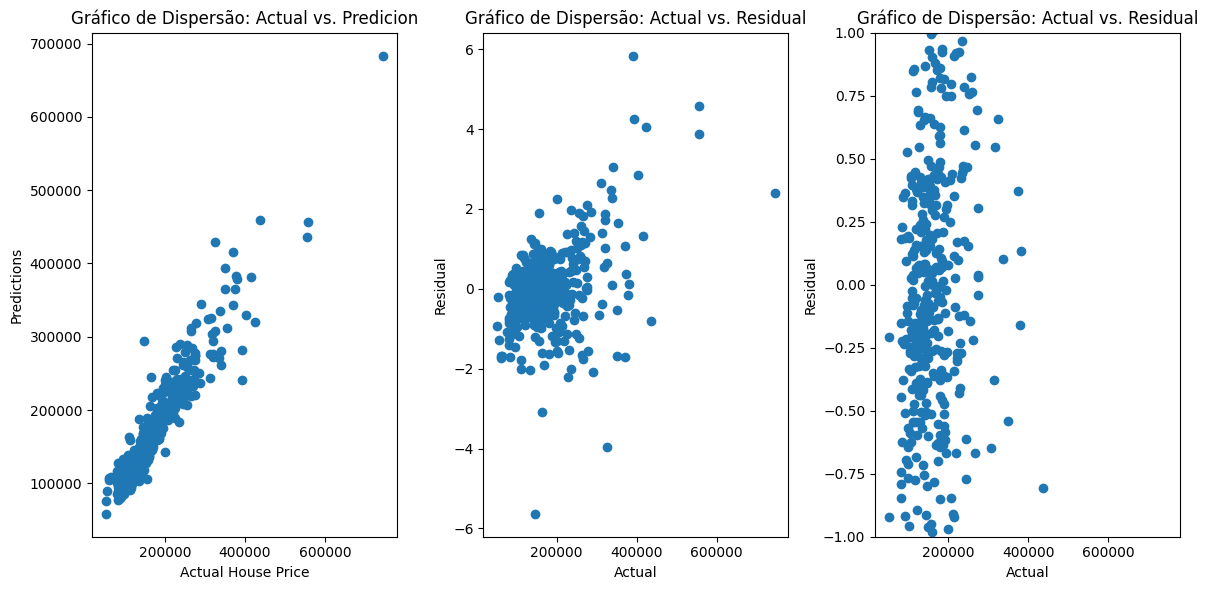

In [12]:
# Criar subplots
plt.figure(figsize=(12, 6))  # Define o tamanho da figura

# Primeiro subplot
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, primeiro subplot
plt.scatter(y_test,predictions)
plt.xlabel('Actual House Price')
plt.ylabel('Predictions')
plt.title(f'Gráfico de Dispersão: Actual vs. Predicion')

# Segundo subplot
plt.subplot(1, 3, 2)  # 1 linha, 2 colunas, segundo subplot
plt.scatter(y_test,residual)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title(f'Gráfico de Dispersão: Actual vs. Residual')


# Terceiro subplot
plt.subplot(1, 3, 3)  # 1 linha, 2 colunas, segundo subplot
plt.scatter(y_test,residual)
plt.ylim(-1,1)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title(f'Gráfico de Dispersão: Actual vs. Residual')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


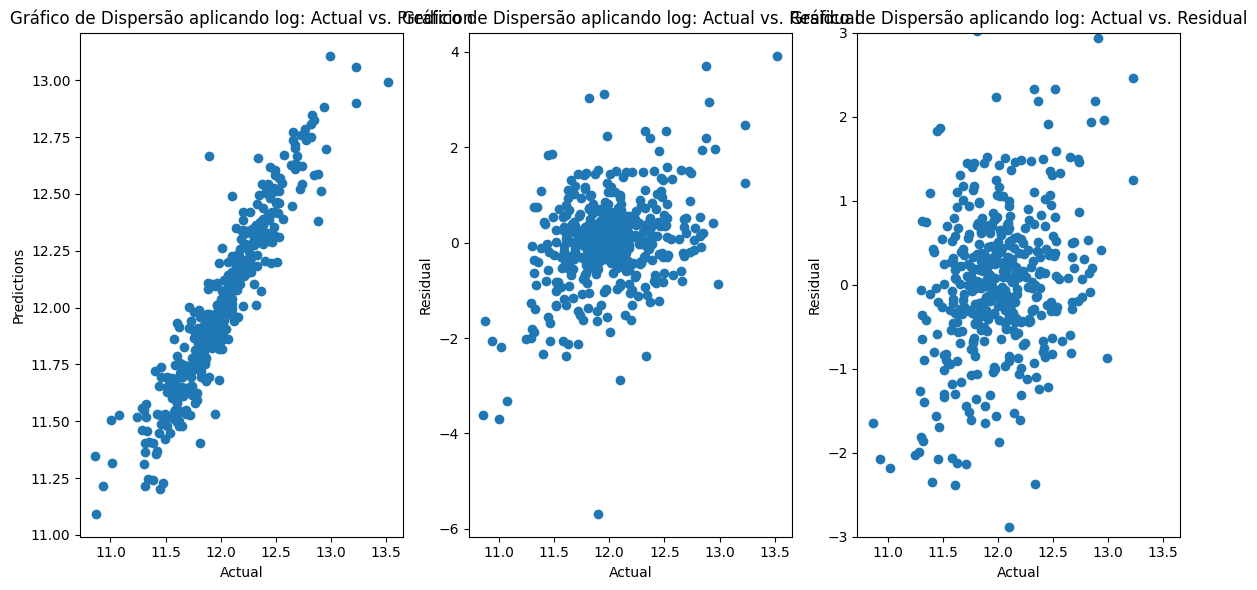

In [13]:
# Criar subplots
plt.figure(figsize=(12, 6))  # Define o tamanho da figura

# Primeiro subplot
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, primeiro subplot
plt.scatter(y_test.apply(np.log) , predictions_log)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title(f'Gráfico de Dispersão aplicando log: Actual vs. Predicion')

# Segundo subplot
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, segundo subplot
plt.scatter(y_test.apply(np.log),residual_log)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title(f'Gráfico de Dispersão aplicando log: Actual vs. Residual')


# Terceiro subplot
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, segundo subplot
plt.ylim(-3,3)
plt.scatter(y_test.apply(np.log),residual_log)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title(f'Gráfico de Dispersão aplicando log: Actual vs. Residual')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()
